# 🌡 Measuring Baseline

In [1]:
!pip install rrcf

  Preparing metadata (setup.py) ... done
  Created wheel for rrcf: filename=rrcf-0.4.4-py3-none-any.whl size=10602 sha256=7cb1f5dc93f73945f042ef3cf7a92029936d4371cb9e6337afa2065b0ff492c8
  Stored in directory: /root/.cache/pip/wheels/ea/7a/ed/e7e38a1f8de53cecb4f55d9b557e5d7875fd66410532ba26ad
Successfully built rrcf


In [4]:
import rrcf
import pandas as pd

# Load DataSet
synthetic_ts_df = pd.read_csv('generated_dataset.csv')

# Initialize the forest
num_trees = 100
tree_size = 100
forest = [rrcf.RCTree() for _ in range(num_trees)]

# Save index of detected anomaly points
anomaly_indices = []

# Stream data and get scores
for i, point in enumerate(synthetic_ts_df['value']):
    avg_codisp = 0
    for tree in forest:
        # If tree is full, forget the oldest point (Sliding Window)
        if len(tree.leaves) > tree_size:
            tree.forget_point(i - tree_size)

        # Insert the new point and calculate "Co-displacement" (anomaly score)
        tree.insert_point(point, index=i)
        avg_codisp += tree.codisp(i) / num_trees

    if avg_codisp > 20:  # Your chosen threshold
        print(f"Anomaly detected at index {i} with score {avg_codisp}")
        anomaly_indices.append(i)

Anomaly detected at index 50 with score 28.9897380952381
Anomaly detected at index 106 with score 20.45568786119761
Anomaly detected at index 113 with score 21.901904761904753
Anomaly detected at index 125 with score 21.55595238095238
Anomaly detected at index 150 with score 59.91250000000001
Anomaly detected at index 199 with score 22.867391679957493
Anomaly detected at index 200 with score 52.448888888888845
Anomaly detected at index 204 with score 24.199068376068386
Anomaly detected at index 250 with score 25.246644425058964
Anomaly detected at index 280 with score 30.88999999999995
Anomaly detected at index 281 with score 30.05166666666662
Anomaly detected at index 282 with score 29.763333333333286
Anomaly detected at index 283 with score 30.999999999999947
Anomaly detected at index 284 with score 27.581250000000026
Anomaly detected at index 285 with score 38.71000000000002
Anomaly detected at index 287 with score 31.980000000000008
Anomaly detected at index 291 with score 32.98999

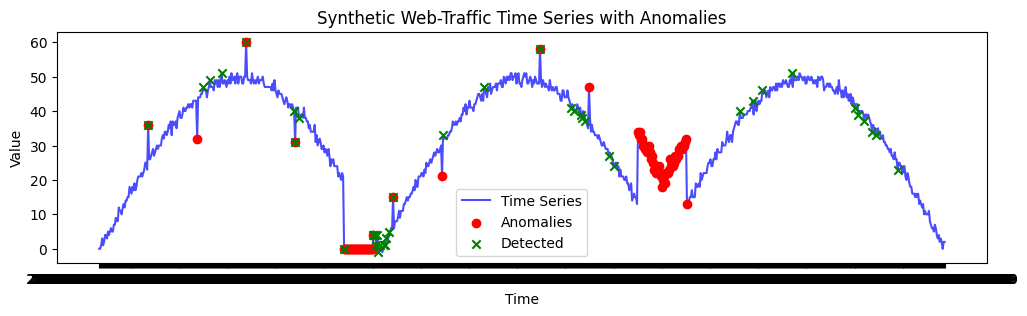

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))
plt.plot(synthetic_ts_df['timestamp'], synthetic_ts_df['value'], label='Time Series', color='blue', alpha=0.7)
plt.scatter(synthetic_ts_df[synthetic_ts_df['is_anomaly'] == 1]['timestamp'],
            synthetic_ts_df[synthetic_ts_df['is_anomaly'] == 1]['value'],
            color='red', label='Anomalies', zorder=5)
plt.scatter(synthetic_ts_df.iloc[anomaly_indices]['timestamp'],
            synthetic_ts_df.iloc[anomaly_indices]['value'],
            color='green', marker='x', label='Detected', zorder=5)

plt.title("Synthetic Web-Traffic Time Series with Anomalies")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()